In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [3]:
dta = sm.datasets.fair.load_pandas().data

In [4]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [5]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [6]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [13]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [14]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [15]:
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


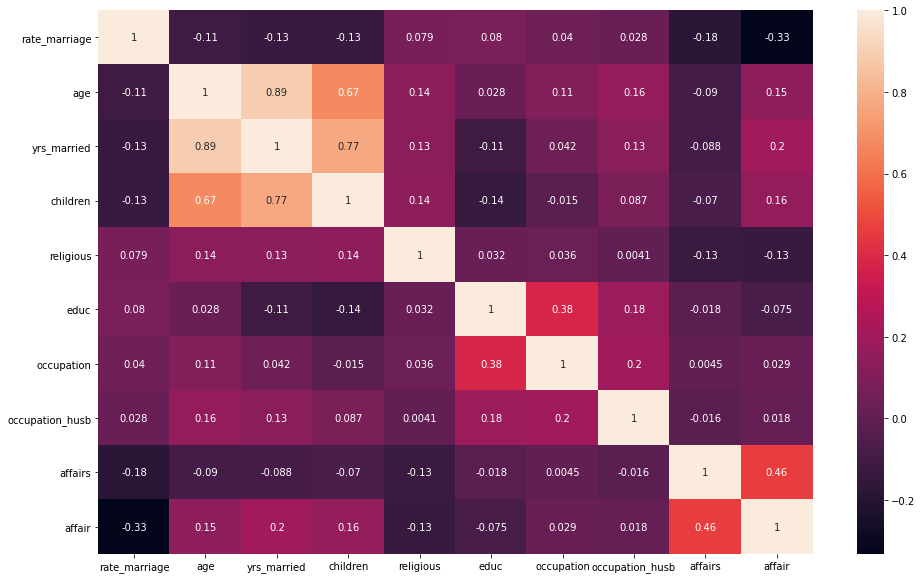

In [17]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(dta.corr(), annot=True)
plt.show()

### Rate Marriage

woman's rating of her marriage (1 = very poor, 5 = very good)

In [19]:
dta['rate_marriage'].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

ordinal categorical variables, no need of one hot encoding

<AxesSubplot:xlabel='rate_marriage', ylabel='count'>

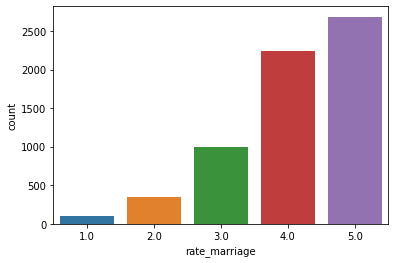

In [20]:
sns.countplot(dta['rate_marriage'])

### Age

woman's age

In [21]:
dta['age'].value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

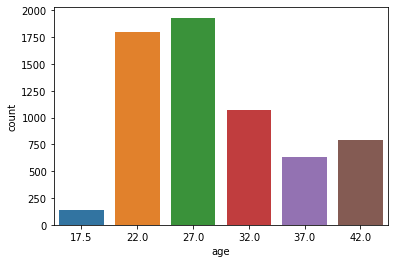

In [22]:
sns.countplot(dta['age'])

numerical variable

### Years married

number of years married

In [23]:
dta['yrs_married'].value_counts()

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

<AxesSubplot:xlabel='yrs_married', ylabel='count'>

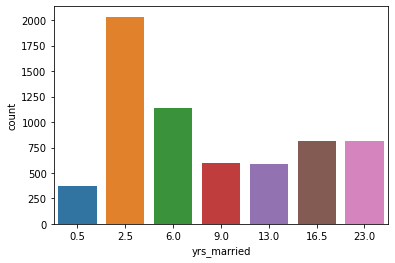

In [24]:
sns.countplot(dta['yrs_married'])

highly correlated with age

### Children

number of children

In [25]:
dta['children'].value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

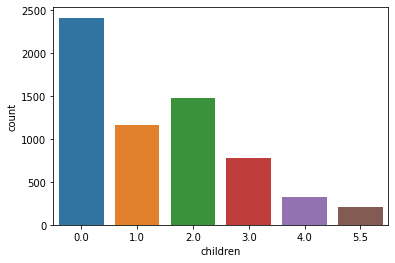

In [26]:
sns.countplot(dta['children'])

5.5 means five and more

some correlation with yrs_married

### Religious

woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

In [28]:
dta['religious'].value_counts()

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

<AxesSubplot:xlabel='religious', ylabel='count'>

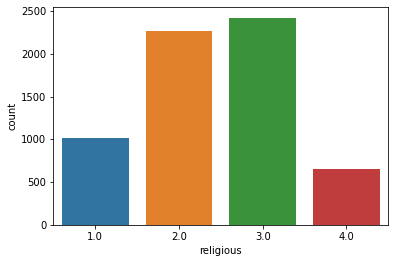

In [29]:
sns.countplot(dta['religious'])

ordinal categorical variables, no need of one hot encoding

### Education

level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

In [31]:
dta['educ'].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

<AxesSubplot:xlabel='educ', ylabel='count'>

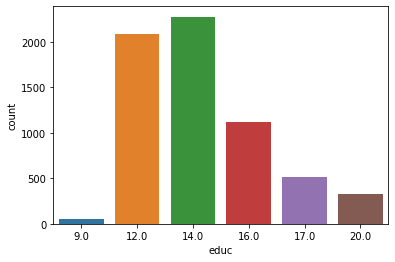

In [32]:
sns.countplot(dta['educ'])

ordinal categorical variables, no need of one hot encoding

### Occupation

woman's occupation (1 = student, 2 = farming/semi- skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

In [35]:
dta['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

<AxesSubplot:xlabel='occupation', ylabel='count'>

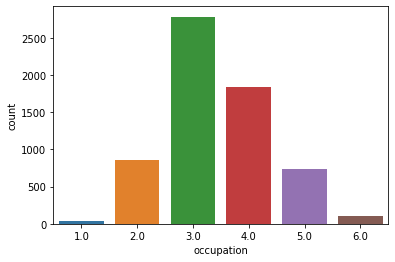

In [36]:
sns.countplot(dta['occupation'])

In [46]:
dta_1=pd.get_dummies(dta['occupation'], prefix='Occupation', drop_first=True)
dta_1

,Occupation_2.0,Occupation_3.0,Occupation_4.0,Occupation_5.0,Occupation_6.0
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
6361,0,0,1,0,0
6362,0,0,0,1,0
6363,0,1,0,0,0
6364,0,1,0,0,0


### Occupation Husband

husband's occupation (same coding as above)

In [37]:
dta['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

<AxesSubplot:xlabel='occupation_husb', ylabel='count'>

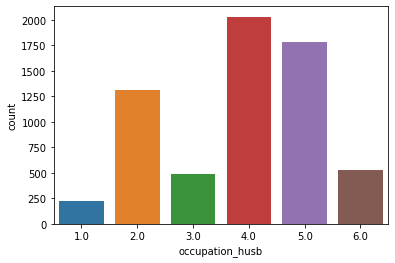

In [38]:
sns.countplot(dta['occupation_husb'])

In [47]:
dta_2=pd.get_dummies(dta['occupation_husb'], prefix='Occupation_husb', drop_first=True)
dta_2

,Occupation_husb_2.0,Occupation_husb_3.0,Occupation_husb_4.0,Occupation_husb_5.0,Occupation_husb_6.0
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
6361,0,1,0,0,0
6362,0,0,0,1,0
6363,0,0,0,0,0
6364,0,0,1,0,0


### Affairs

time spent in extra-marital affairs

In [39]:
dta['affairs'].value_counts()

0.000000     4313
1.400000      118
0.583333       86
0.400000       72
1.333333       72
             ... 
0.622222        1
39.199982       1
7.111111        1
4.923077        1
0.339394        1
Name: affairs, Length: 77, dtype: int64

<AxesSubplot:xlabel='affairs', ylabel='count'>

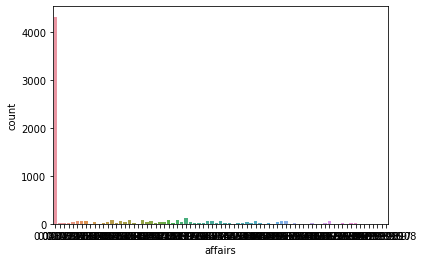

In [40]:
sns.countplot(dta['affairs'])

### Affair

In [42]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

<AxesSubplot:xlabel='affair', ylabel='count'>

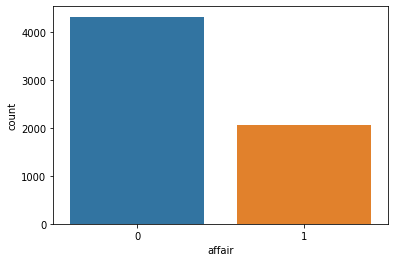

In [43]:
sns.countplot(dta['affair'])

In [48]:
X=pd.concat([dta,dta_1,dta_2], axis=1)
X=X.drop(['occupation', 'occupation_husb', 'affair'], axis=1)
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Occupation_2.0,Occupation_3.0,Occupation_4.0,Occupation_5.0,Occupation_6.0,Occupation_husb_2.0,Occupation_husb_3.0,Occupation_husb_4.0,Occupation_husb_5.0,Occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000,0,1,0,0,0,0,0,1,0,0


### Scalling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
X_scaled=sc.fit_transform(X)

In [54]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -6.84232001e-01,  1.60574433e+00, -3.01356313e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
         1.46149259e+00, -6.22764150e-01, -3.01356313e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -6.84232001e-01,  1.60574433e+00, -3.01356313e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -6.84232001e-01, -6.22764150e-01, -3.01356313e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
         1.46149259e+00, -6.22764150e-01, -3.01356313e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         1.46149259e+00, -6.22764150e-01, -3.01356313e-01]])

### Splitting the data into train and test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

### Logistic Regression

In [56]:
log_reg=LogisticRegression()

In [57]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred=log_reg.predict(X_test)

### Model Evaluation

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1121
         1.0       0.88      1.00      0.93       471

    accuracy                           0.96      1592
   macro avg       0.94      0.97      0.95      1592
weighted avg       0.96      0.96      0.96      1592



In [61]:
print(confusion_matrix(y_pred, y_test))

[[1055   66]
 [   0  471]]
